In [26]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include(pathtorepo * "/system.jl");
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


TM6_glial_ECM_help (generic function with 1 method)

In [27]:
using DifferentialEquations, StaticArrays, DynamicalSystems
sE, sI, rE, rI, Y  = -50..50, -50..50,  -50..50, -50..50, -50..50
box = sE × sI × rE × rI × Y
using CairoMakie

In [28]:
tstart = 0.0; tfinish = 1000.0;
tspan = (tstart, tfinish)
u0 = [0.15473490548603275, 0.331097693563937, 0.0014004202695592966, 0.0431859950512129, 5.3783108169207677e-11]
params = rate_model_get_params()

In [38]:
params[21] = 5.0;
params[9] = 1.75

1.75

In [39]:
integrator_setting = (alg = RK4(), adaptive = false, dt = 1e-3);
ds = CoupledODEs(rate_model, u0, params, diffeq = integrator_setting)

5-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  rate_model
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [3.0, 4.0, 0.15, 10.0, 8.0, 0.1, 2.0, 5.0, 1.75, 3.5  …  0.0, 5.0, 3.0, 0.4, 0.01, 0.01, 5.0, 0.5, 0.5, 0.01]
 time:          0.0
 state:         [0.15473490548603275, 0.331097693563937, 0.0014004202695592966, 0.0431859950512129, 5.3783108169207677e-11]


In [40]:
tands = TangentDynamicalSystem(ds; J = rate_jac)

5-dimensional TangentDynamicalSystem
 deterministic:     true
 discrete time:     false
 in-place:          false
 dynamic rule:      rate_model
 jacobian:          rate_jac
 deviation vectors: 5
 parameters:        [3.0, 4.0, 0.15, 10.0, 8.0, 0.1, 2.0, 5.0, 1.75, 3.5  …  0.0, 5.0, 3.0, 0.4, 0.01, 0.01, 5.0, 0.5, 0.5, 0.01]
 time:              0.0
 state:             [0.15473490548603275, 0.331097693563937, 0.0014004202695592966, 0.0431859950512129, 5.3783108169207677e-11]


In [62]:
lyapunovspectrum(tands, 10000)

5-element Vector{Float64}:
  -0.16778762016296098
  -0.3358293188922173
  -0.8995853396842297
  -3.499358811572523
 -Inf

In [63]:
lyapunovspectrum(ds, 10000)

5-element Vector{Float64}:
  -0.16778762016296098
  -0.3358293188922173
  -0.8995853396842297
  -3.499358811572523
 -Inf

In [47]:
fp, ei, _ = fixedpoints(ds, box, rate_jac);

In [48]:
maximum(real(ei[1]))

0.3501861352834561

In [49]:
tr, trange = trajectory(ds, 1000, Δt = 0.001)

(5-dimensional StateSpaceSet{Float64} with 1000001 points, 0.0:0.001:1000.0)

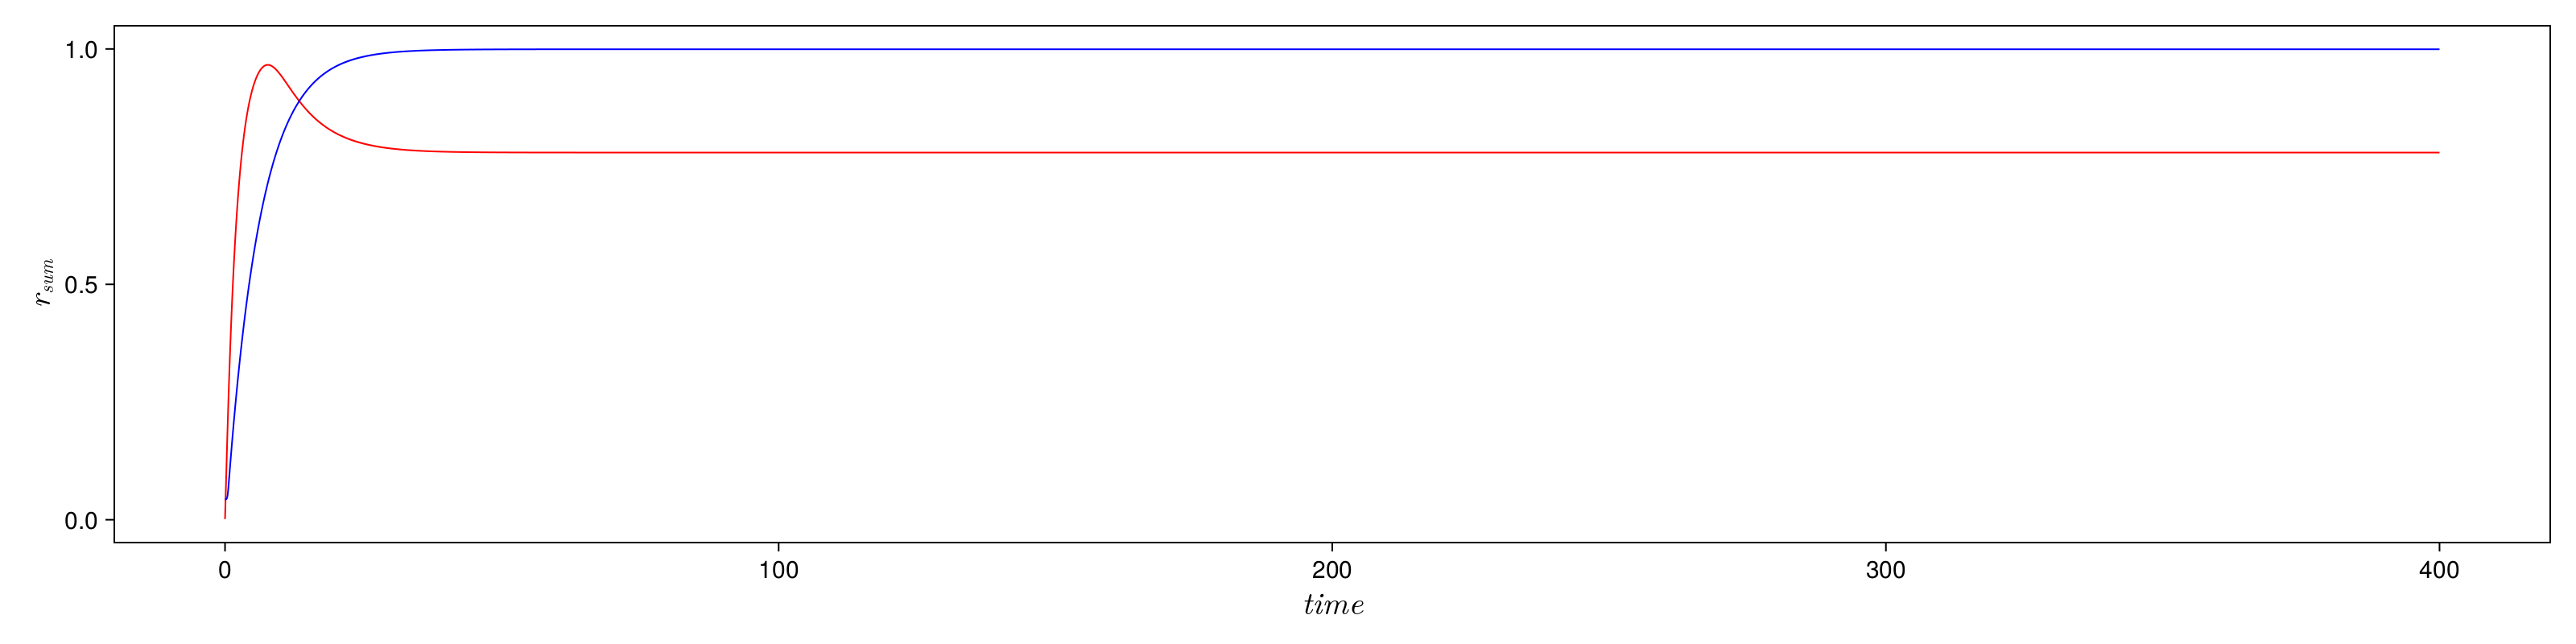

CairoMakie.Screen{IMAGE}


In [52]:
tstart, tend = 1, 400000
tickssize = 15
labelsize = 20

f= Figure(size = (1600, 400))
axisrHz  = Axis(f[1, 1], xlabel = L"time", ylabel = L"r_{sum}", xlabelsize = labelsize, ylabelsize = labelsize, xticklabelsize = tickssize, yticklabelsize = tickssize, xgridvisible = false, ygridvisible = false)

lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 3], linewidth = 1.0, color = :red)
lines!(axisrHz, trange[tstart:tend], tr[tstart:tend, 4], linewidth = 1.0, color = :blue)

display(f)

In [70]:
range_γY = range(0.0, 150.0, length = 350)
range_IE = range(0.0, 2.0, length = 350)

0.0:0.0057306590257879654:2.0